# <font color=blue>Assignments for "Plotting Basic Charts With Matplotlib"</font>

In this assignment, you will continue work with the [Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data). You will plot different chart types. Don't forget to set titles and axis labels.

1. Plot a bar chart for total cases of the 20 countries that havebiggest numbers.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

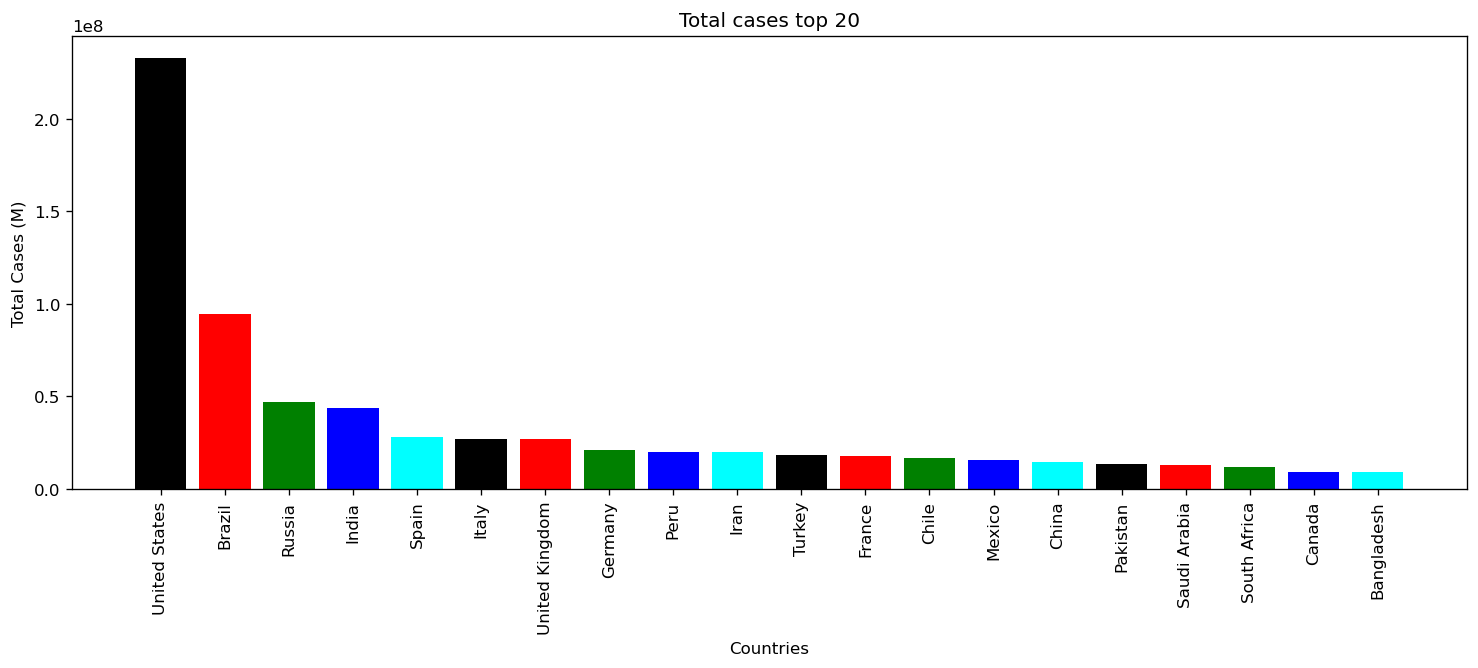

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
#from datetime import datetime
#startingFrom=datetime.now()- pd.to_timedelta("100day")
#print(startingFrom)

covid_data=pd.read_csv("owid-covid-data.csv",low_memory=False)

#filtered out World total case from data. grouped by countries and get sum of total_case for each country  
# and sorted from biggest to lowest and finaly get top 20 rows.

total_cases_top20=covid_data[covid_data.location!="World"].groupby(["location"]).agg({"total_cases":["sum"]}).sort_values([("total_cases","sum")],ascending=False).iloc[:20,:]

c=total_cases_top20.index   # coutnries => bar x
h=total_cases_top20[("total_cases","sum")] #  sum-column => bar heights 

fig=plt.figure(figsize=(15,5),dpi=120)

plt.bar(c,h, color=['black', 'red', 'green', 'blue', 'cyan']) 

plt.title("Total cases top 20")
plt.xlabel("Countries")
plt.ylabel("Total Cases (M)")
plt.xticks(rotation=90)



2. Plot a histogram for daily deaths for any country you choose. Make three subplots for different bins.

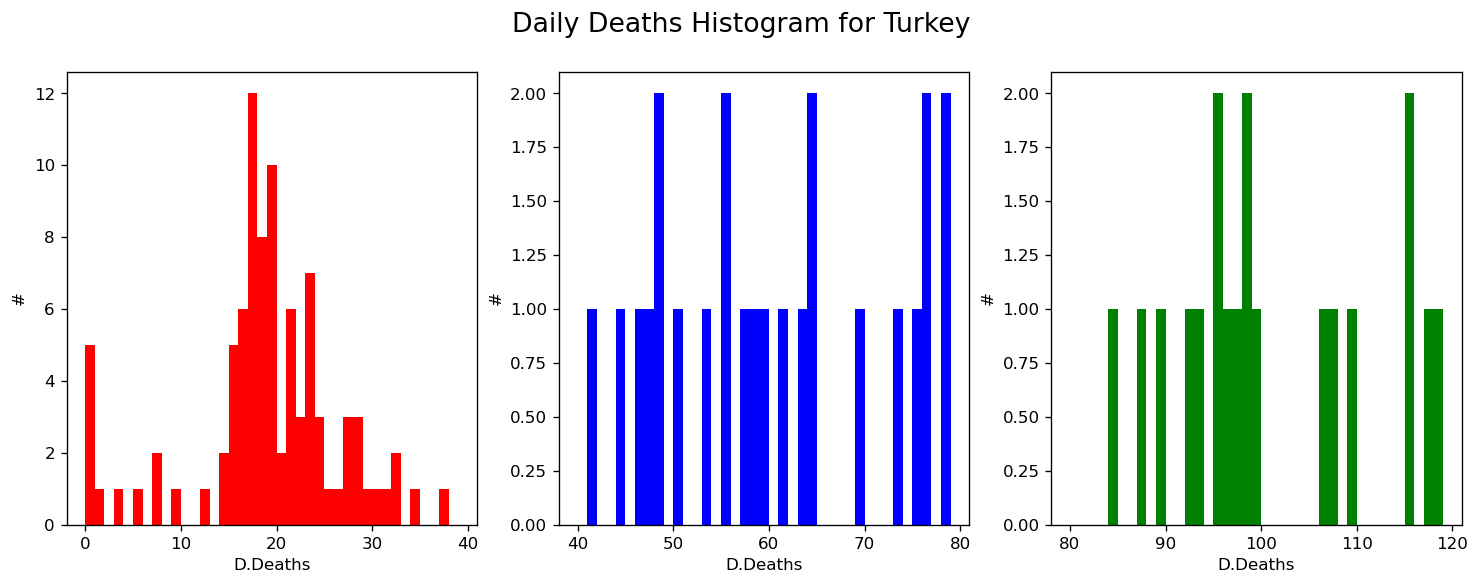

In [11]:
import numpy as np

country="Turkey" #input("Enter country name")

country_data=covid_data[covid_data.location==country]

#display(country_data.head())

daily_deaths=country_data["new_deaths"]

fig=plt.figure(figsize=(15,5),dpi=120)
fig.suptitle("Daily Deaths Histogram for {}".format(country),fontsize=16)

# x=> 0 -120   bin1=0-40  bin2=40-80  bin3: 80-120  

plt.subplot(1,3,1)
plt.hist(daily_deaths, bins=np.arange(0,40), color="red")
plt.xlabel("D.Deaths")
plt.ylabel("#")
plt.subplot(1,3,2)
plt.hist(daily_deaths, bins=np.arange(40,80), color="blue")
plt.xlabel("D.Deaths")
plt.ylabel("#")

plt.subplot(1,3,3)
plt.hist(daily_deaths, bins=np.arange(80,120), color="green")
plt.xlabel("D.Deaths")
plt.ylabel("#")

import warnings
warnings.filterwarnings('ignore')



3. Plot a scatter plot of new cases and new death for Germany and France.

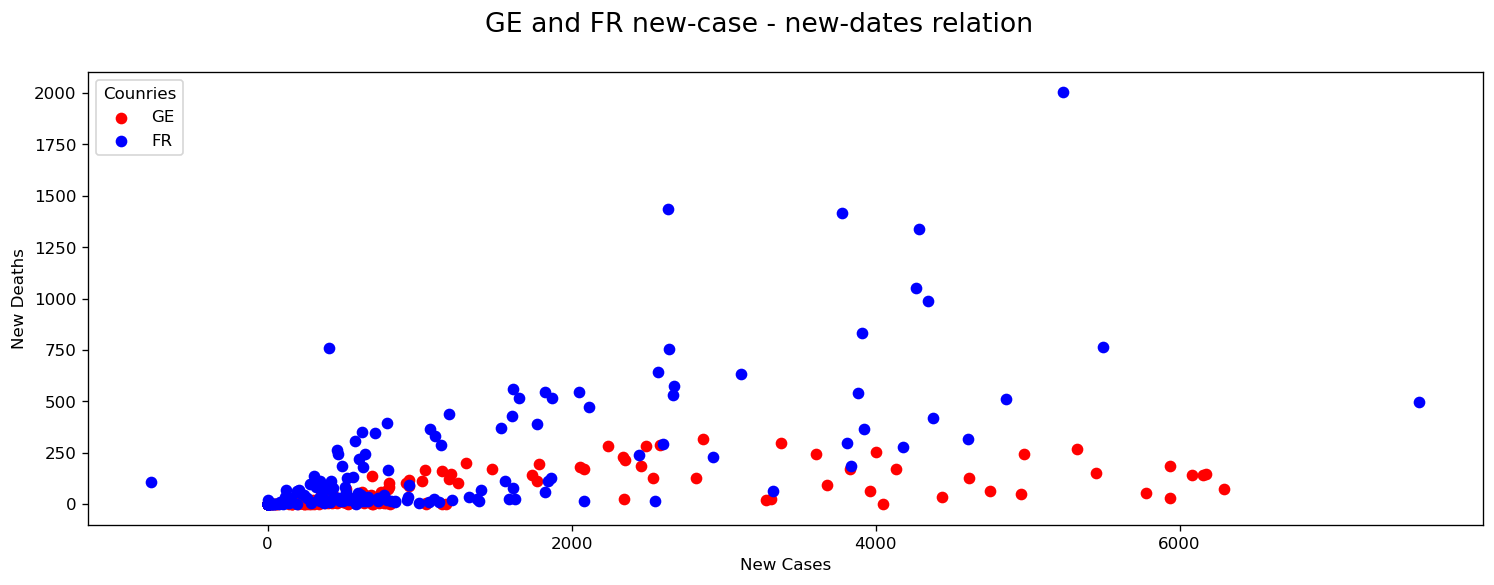

In [31]:
covid_filtered=covid_data[covid_data.location.isin(["Germany","France"])] #[["location","new_cases","new_deaths"]]

covid_filtered.head()

ge_nc=covid_filtered[covid_filtered.location=="Germany"]["new_cases"]
ge_nd=covid_filtered[covid_filtered.location=="Germany"]["new_deaths"]

fr_nc=covid_filtered[covid_filtered.location=="France"]["new_cases"]
fr_nd=covid_filtered[covid_filtered.location=="France"]["new_deaths"]

fig=plt.figure(figsize=(15,5),dpi=120)
fig.suptitle("GE and FR new-case - new-dates relation ",fontsize=16)
plt.scatter(ge_nc,ge_nd,color="red",label="GE")
plt.scatter(fr_nc,fr_nd,color="blue",label="FR")
plt.xlabel("New Cases")
plt.ylabel("New Deaths")
plt.legend(title="Counries",loc=2)


import warnings
warnings.filterwarnings('ignore')


4. Plot a boxplot for daily deaths for any country you choose.

30809     0.0
30810     0.0
30811     0.0
30812     0.0
30813     0.0
         ... 
30943    16.0
30944    17.0
30945    17.0
30946    15.0
30947    14.0
Name: new_deaths, Length: 139, dtype: float64

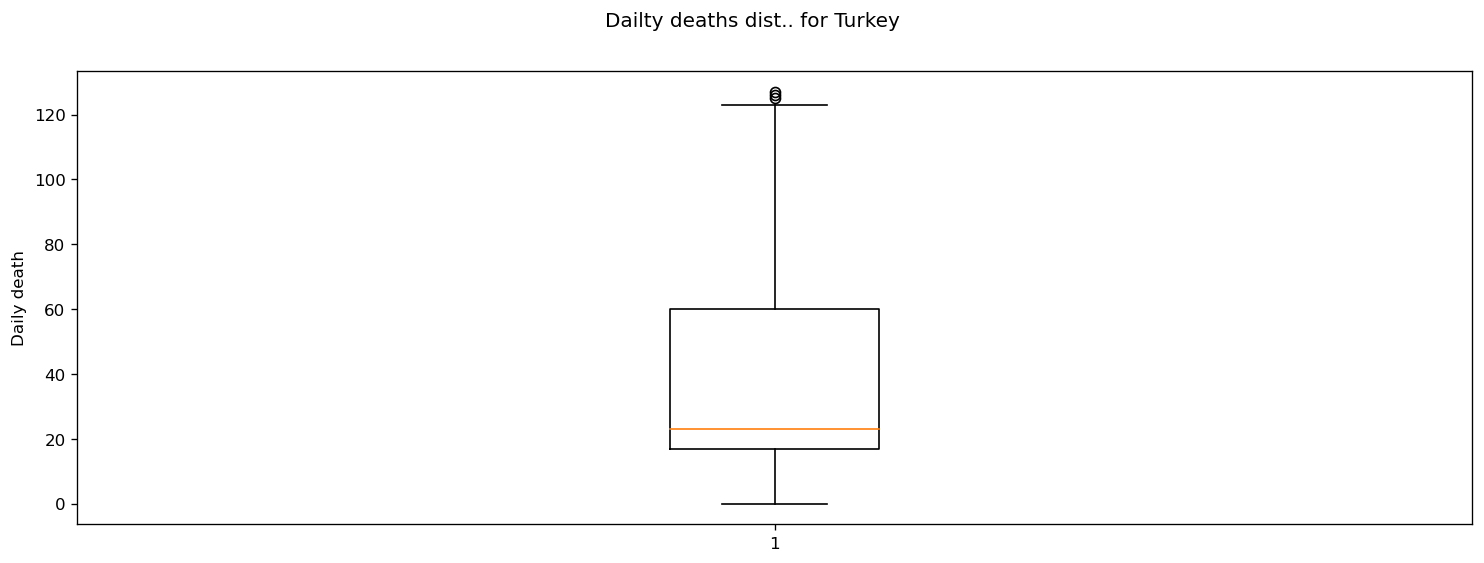

In [38]:
country="Turkey" # input("Enter a country name")
country_daily=covid_data[covid_data.location==country]["new_deaths"]

display(country_daily)

fig=plt.figure(figsize=(15,5),dpi=120)
fig.suptitle("Dailty deaths dist.. for {}".format(country))

plt.boxplot(country_daily)
plt.ylabel("Daily death")
plt.show()

import warnings
warnings.filterwarnings('ignore')


5. Calculate the total case for each continent and plot a pie chart 

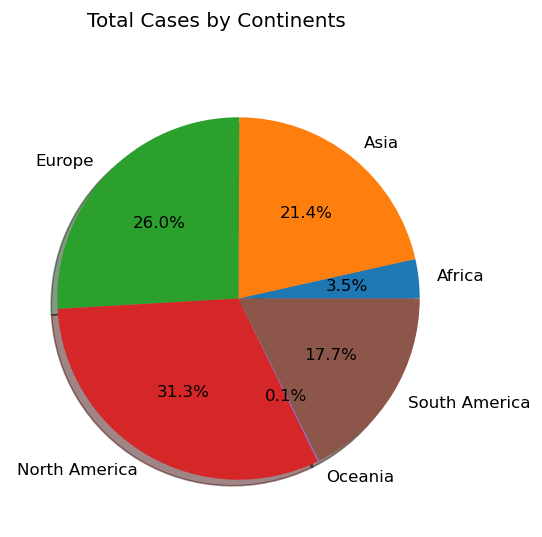

In [54]:
#covid_data.head()

covid_by_cont=covid_data.groupby("continent").agg({"total_cases":["sum"]})   # [covid_data.location=="World"]  

#display(covid_by_cont)

#covid_by_cont.index


fig=plt.figure(figsize=(15,5),dpi=120)
fig.suptitle("Total Cases by Continents")

plt.pie(covid_by_cont,labels=covid_by_cont.index,autopct="%1.1f%%",shadow=True)

import warnings

warnings.filterwarnings("ignore")
